In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
#as we see we have more column so lets check all column detail
pd.set_option('max_columns', None)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA

In [6]:
# check the size of dataset
df.shape

(8425, 23)

as we see we have 8425 rows and 23 columns in our dataset

In [7]:
# lets check null values in our dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

As we see our dataset is having null value also there are some categorical column also

In [9]:
# lets check description of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [10]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
# Lets checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
# Checking the values counts of each columns
for a in df.columns:
    print(df[a].value_counts())
    print('########################################')

2011-06-08    5
2011-01-28    5
2011-01-23    5
2011-05-11    5
2011-05-10    5
             ..
2015-09-12    1
2013-05-28    1
2013-05-07    1
2013-01-30    1
2013-01-31    1
Name: Date, Length: 3004, dtype: int64
########################################
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
########################################
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
########################################
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331, dtype: int64
########################################
0.0  

We can drop the column date because it is of no use in predicting weather

In [13]:
df = df.drop('Date', axis=1)

#### Handling Missing values in Categorical column:

In [14]:
# replacing numerical column with median
df["MinTemp"] = df["MinTemp"].fillna(df["MinTemp"].median())
df["MaxTemp"] = df["MaxTemp"].fillna(df["MaxTemp"].median())
df["Rainfall"] = df["Rainfall"].fillna(df["Rainfall"].median())
df["Evaporation"] = df["Evaporation"].fillna(df["Evaporation"].median())
df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].median())
df["WindGustSpeed"] = df["WindGustSpeed"].fillna(df["WindGustSpeed"].median())
df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df["WindSpeed9am"].median())
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].median())
df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].median())
df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].median())
df["Pressure9am"] = df["Pressure9am"].fillna(df["Pressure9am"].median())
df["Pressure3pm"] = df["Pressure3pm"].fillna(df["Pressure3pm"].median())
df["Cloud9am"] = df["Cloud9am"].fillna(df["Cloud9am"].median())
df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].median())
df["Cloud9am"] = df["Cloud9am"].fillna(df["Cloud9am"].median())
df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].median())
df["Temp9am"] = df["Temp9am"].fillna(df["Temp9am"].median())
df["Temp3pm"] = df["Temp3pm"].fillna(df["Temp3pm"].median())

In [15]:
# Replacing null values in categorical columns
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].mode()[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].mode()[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0])
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])
df["RainTomorrow"] = df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0])

In [16]:
# now again check  the null value
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

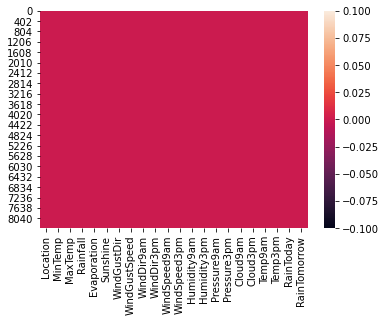

In [17]:
#lets check the null value by heatmap
sns.heatmap(df.isnull())

In [18]:
df.isnull().values.any()

False

As we see after filling NAN there is no missing value in our dataset

# Data Visualization

Exploring target variable which is RainTomorrow

<AxesSubplot:>

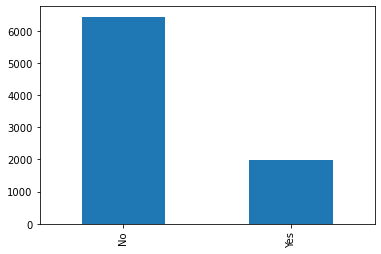

In [19]:
df['RainTomorrow'].value_counts().plot(kind='bar')

From this plot we can see there is data imbalancing problem in our dataset

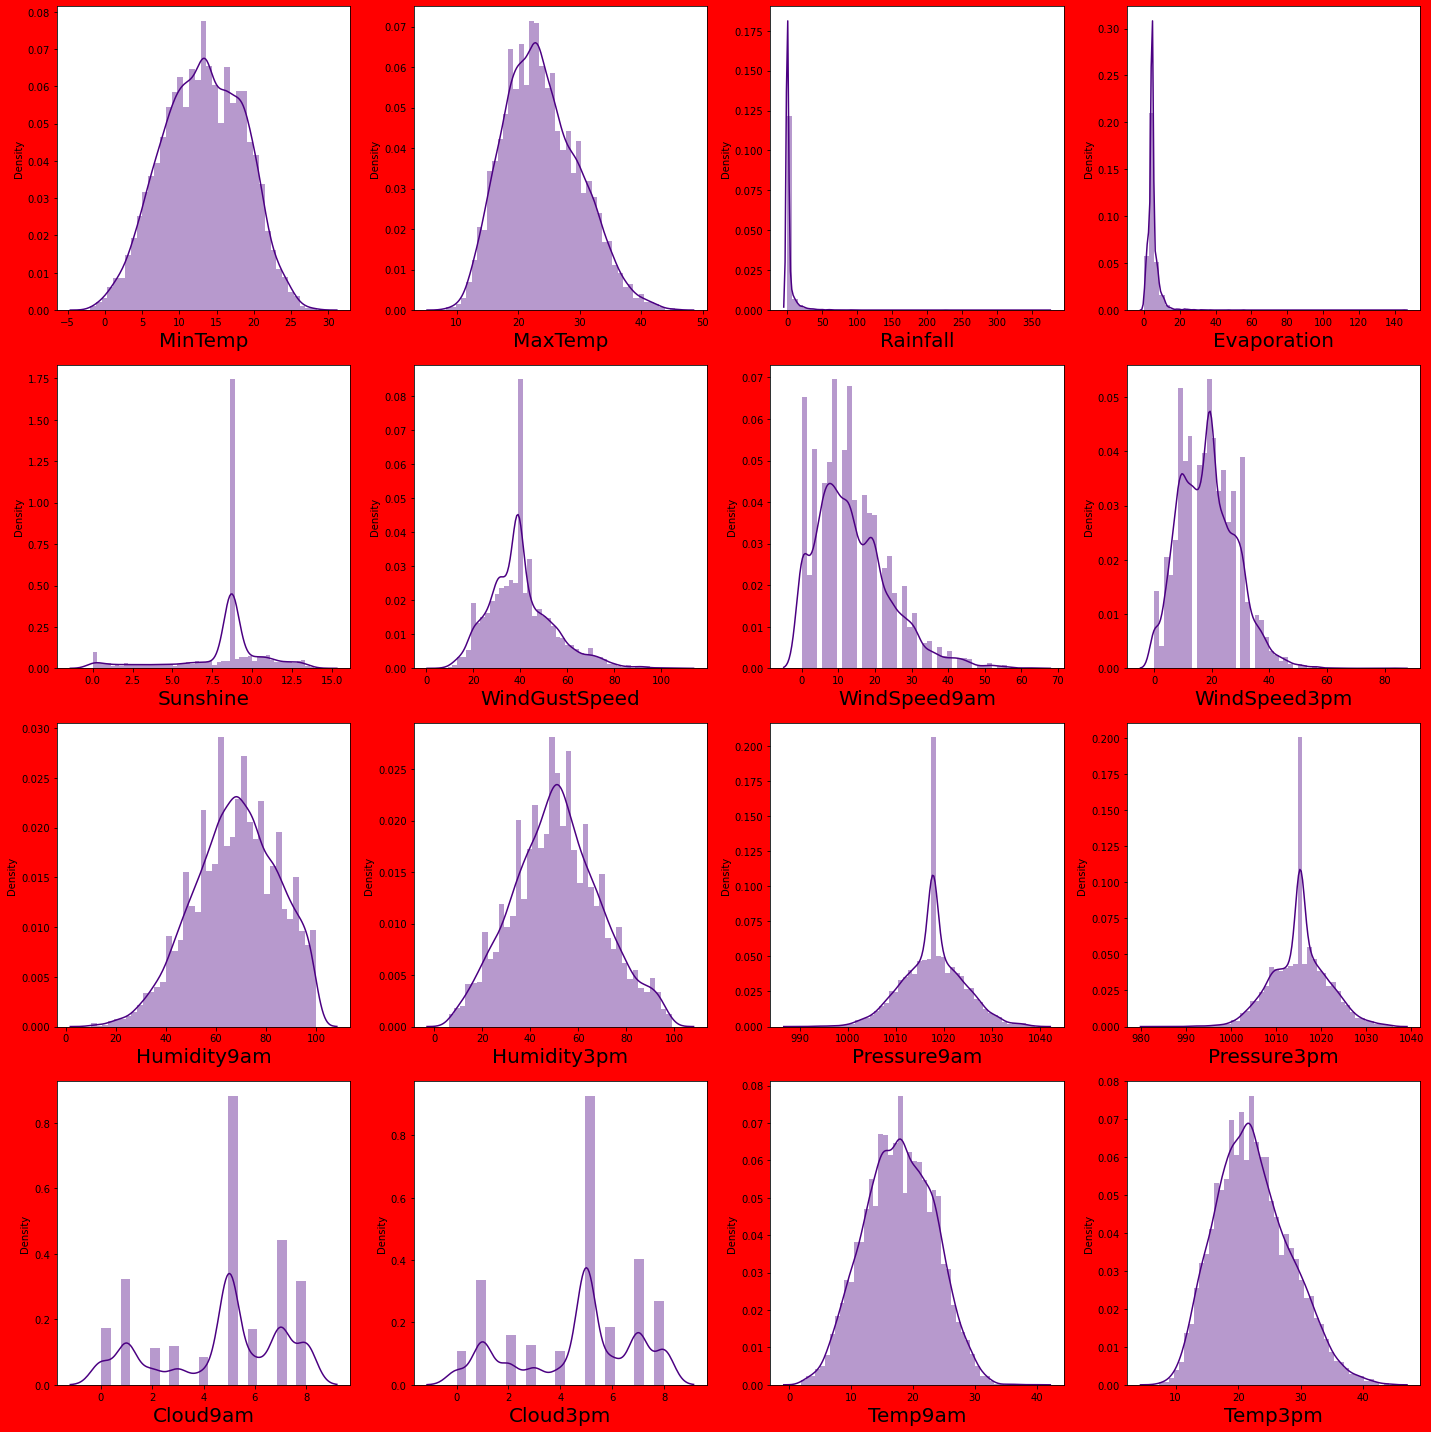

In [22]:
# check distribution of data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,20),facecolor='red')
plotnumber=1
for column in numerical_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

It look like data is not normally distributed

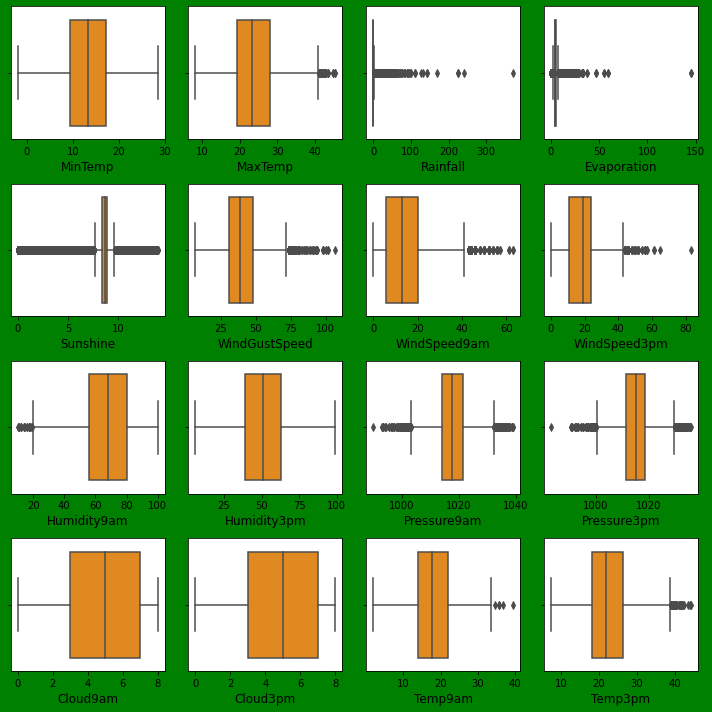

In [23]:
plt.figure(figsize=(10,10),facecolor='green')
plotnumber=1
for column in numerical_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Outliers are present in our dataset so we need to remove outliers

In [25]:
#now remove the outliers by Z score method
# numerical columns containing outliers
features = df[['MaxTemp', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Pressure9am','Pressure3pm', 'Temp3pm']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.15635196, 0.28763003, 0.60819716, ..., 1.58547366, 1.31025664,
        0.10709248],
       [0.20345828, 0.28763003, 0.97153572, ..., 1.12335349, 1.19766441,
        0.31337416],
       [0.30158835, 0.43276288, 0.50946385, ..., 1.60140884, 1.05290297,
        0.12836884],
       ...,
       [0.49784848, 0.22033491, 0.47786919, ..., 0.53390508, 0.24994998,
        0.61611014],
       [0.51420349, 0.87343269, 0.08293598, ..., 0.27894223, 0.20169616,
        0.59929147],
       [0.09093192, 0.07520207, 0.31199724, ..., 0.40642366, 0.42688062,
        0.25846047]])

In [26]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.6,8.7,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.6,8.7,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.6,8.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.6,8.7,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.6,8.7,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,4.6,8.7,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
8421,Uluru,3.6,25.3,0.0,4.6,8.7,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
8422,Uluru,5.4,26.9,0.0,4.6,8.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
8423,Uluru,7.8,27.0,0.0,4.6,8.7,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [27]:
#check the shape of original data and after removing outlier
df.shape

(8425, 22)

In [28]:
new_df.shape

(8185, 22)

In [29]:
# Checking the the data loss
data_loss = (614-577)/614*100
data_loss


6.026058631921824

In [30]:
#Checking for skewness
new_df.skew()

MinTemp          -0.100946
MaxTemp           0.320717
Rainfall         13.724476
Evaporation      14.428704
Sunshine         -1.201134
WindGustSpeed     0.543271
WindSpeed9am      0.712990
WindSpeed3pm      0.293971
Humidity9am      -0.263866
Humidity3pm       0.122531
Pressure9am       0.014146
Pressure3pm       0.041540
Cloud9am         -0.511648
Cloud3pm         -0.449543
Temp9am          -0.037912
Temp3pm           0.340148
dtype: float64

## Removing Skewness using yeo-johnson method

In [31]:
skew = ['Rainfall', 'Evaporation']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [32]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,Rainfall,Evaporation
0,0.672290,0.054108
1,-0.661576,0.054108
2,-0.661576,0.054108
3,-0.661576,0.054108
4,1.033846,0.054108


In [33]:
#lets check skewness again
new_df.skew()

MinTemp         -0.100946
MaxTemp          0.320717
Rainfall         1.022458
Evaporation      0.014958
Sunshine        -1.201134
WindGustSpeed    0.543271
WindSpeed9am     0.712990
WindSpeed3pm     0.293971
Humidity9am     -0.263866
Humidity3pm      0.122531
Pressure9am      0.014146
Pressure3pm      0.041540
Cloud9am        -0.511648
Cloud3pm        -0.449543
Temp9am         -0.037912
Temp3pm          0.340148
dtype: float64

now skewness has also been removed

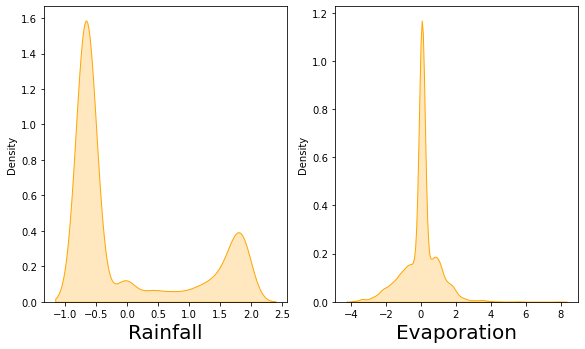

In [34]:
# check the data distribution after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(new_df[column],color='orange',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if new_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [37]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [38]:
new_df.shape

(8185, 22)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8185 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8185 non-null   int32  
 1   MinTemp        8185 non-null   float64
 2   MaxTemp        8185 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    8185 non-null   float64
 5   Sunshine       8185 non-null   float64
 6   WindGustDir    8185 non-null   int32  
 7   WindGustSpeed  8185 non-null   float64
 8   WindDir9am     8185 non-null   int32  
 9   WindDir3pm     8185 non-null   int32  
 10  WindSpeed9am   8185 non-null   float64
 11  WindSpeed3pm   8185 non-null   float64
 12  Humidity9am    8185 non-null   float64
 13  Humidity3pm    8185 non-null   float64
 14  Pressure9am    8185 non-null   float64
 15  Pressure3pm    8185 non-null   float64
 16  Cloud9am       8185 non-null   float64
 17  Cloud3pm       8185 non-null   float64
 18  Temp9am 

In [40]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.672290,0.054108,8.7,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,7.4,25.1,-0.661576,0.054108,8.7,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1,12.9,25.7,-0.661576,0.054108,8.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,1,9.2,28.0,-0.661576,0.054108,8.7,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1,17.5,32.3,1.033846,0.054108,8.7,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


As we see now all categorical column converted into numerical also there is no missing value is our dataset

<AxesSubplot:>

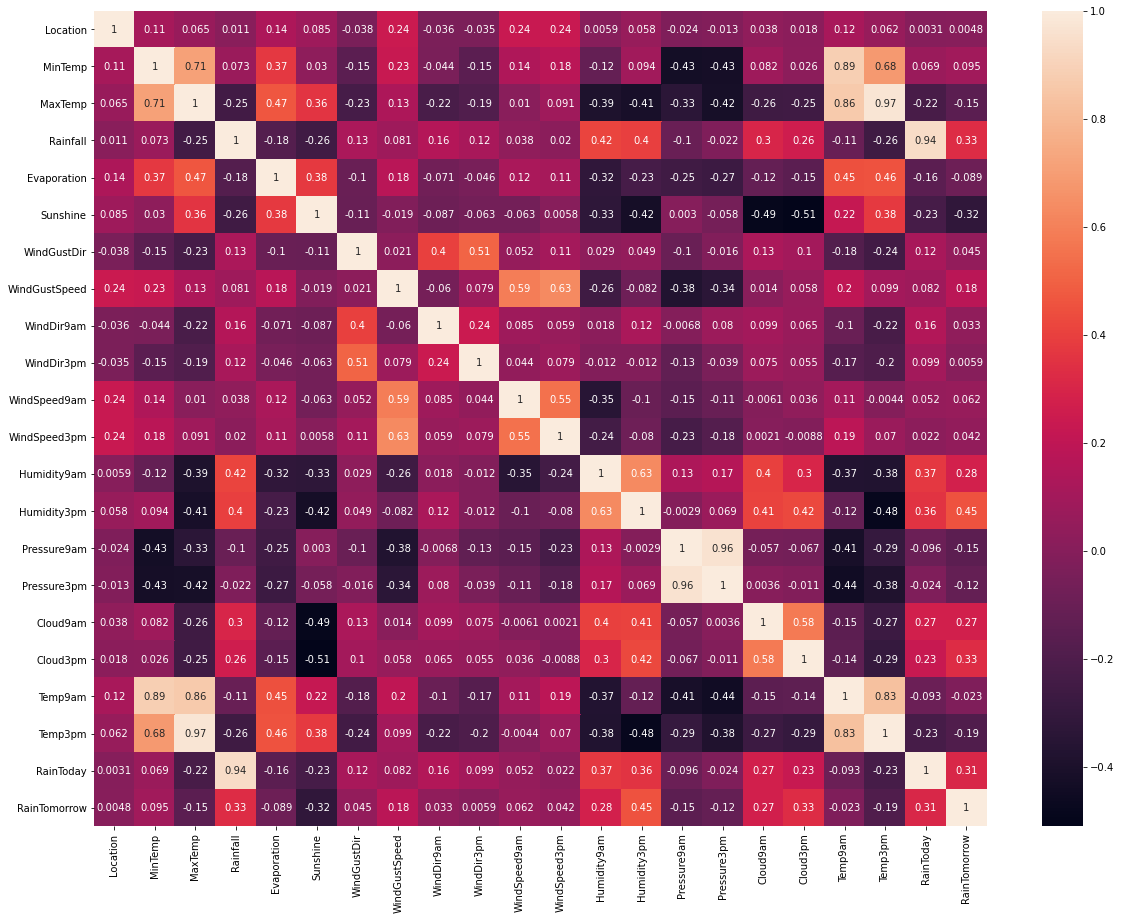

In [42]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(), annot = True)

### Separating the features and label variables into x and y

In [43]:
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

In [44]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.9,0.672290,0.054108,8.7,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,1,7.4,25.1,-0.661576,0.054108,8.7,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,1,12.9,25.7,-0.661576,0.054108,8.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,1,9.2,28.0,-0.661576,0.054108,8.7,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,1,17.5,32.3,1.033846,0.054108,8.7,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,-0.661576,0.054108,8.7,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0
8421,9,3.6,25.3,-0.661576,0.054108,8.7,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0
8422,9,5.4,26.9,-0.661576,0.054108,8.7,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0
8423,9,7.8,27.0,-0.661576,0.054108,8.7,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0


In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8185, dtype: int32

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.509335,0.043095,-0.151455,0.672290,0.054108,0.19125,1.226889,0.366766,1.241899,1.398679,0.705582,0.633472,0.175870,-1.620037,-1.680587,-1.395681,1.357010,0.158158,-0.149480,-0.103419,-0.557359
1,-1.509335,-1.074324,0.214909,-0.661576,0.054108,0.19125,1.439451,0.366766,-0.284696,1.624629,-0.992473,0.416850,-1.448438,-1.455011,-1.196507,-1.277568,0.127529,0.158158,-0.095561,0.324634,-0.557359
2,-1.509335,-0.050023,0.314827,-0.661576,0.054108,0.19125,1.652014,0.523281,1.241899,1.624629,0.599454,0.850095,-1.809395,-1.179967,-1.697279,-1.125710,0.127529,-1.138958,0.587413,0.136291,-0.557359
3,-1.509335,-0.739098,0.697845,-0.661576,0.054108,0.19125,-0.686173,-1.198394,0.369559,-1.764616,-0.249574,-0.991198,-1.388278,-1.950089,-0.028038,-0.433910,0.127529,0.158158,0.066196,0.701320,-0.557359
4,-1.509335,0.806664,1.413921,1.033846,0.054108,0.19125,1.226889,0.131992,-1.375122,-0.182968,-0.674087,0.200227,0.837625,-1.014942,-1.163122,-1.581286,0.947183,1.455274,0.012277,1.249227,-0.557359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,1.016123,-1.931012,-0.068191,-0.661576,0.054108,0.19125,-1.536422,-0.650588,0.369559,-1.538666,-0.037317,-0.774575,-1.027321,-1.510019,1.140432,0.831579,0.127529,0.158158,-1.371645,-0.000686,-0.557359
8181,1.016123,-1.782022,0.248215,-0.661576,0.054108,0.19125,-0.261048,-1.354910,0.369559,-1.086767,-0.037317,-0.991198,-0.726523,-1.675045,0.956815,0.629100,0.127529,0.158158,-1.227861,0.358878,-0.557359
8182,1.016123,-1.446797,0.514662,-0.661576,0.054108,0.19125,-0.898735,-0.181040,0.369559,1.398679,-0.461830,-0.991198,-0.907002,-1.510019,0.539505,0.241017,0.127529,0.158158,-0.940293,0.632831,-0.557359
8183,1.016123,-0.999829,0.531315,-0.661576,0.054108,0.19125,0.376639,-0.885362,0.587644,-1.086767,-0.037317,-1.207820,-1.027321,-1.510019,0.272426,0.190398,-0.692124,-1.138958,-0.472994,0.615709,-0.557359


In [47]:
#Checking the value count of target column
y.value_counts()

0    6276
1    1909
Name: RainTomorrow, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [49]:
# check the value again for target column
y.value_counts()

0    6276
1    6276
Name: RainTomorrow, dtype: int64

now data imbalance issue is solved

### Creating train_test split

In [51]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [52]:
#Classification Algorithms:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

### 1)Decision Tree Classifier

In [53]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8728093467870419
[[1656  253]
 [ 226 1631]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1909
           1       0.87      0.88      0.87      1857

    accuracy                           0.87      3766
   macro avg       0.87      0.87      0.87      3766
weighted avg       0.87      0.87      0.87      3766



The accuracy using Decision Tree Classifier is 87.82%

### 2)Random Forest Classifier

In [54]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9288369622942113
[[1763  146]
 [ 122 1735]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1909
           1       0.92      0.93      0.93      1857

    accuracy                           0.93      3766
   macro avg       0.93      0.93      0.93      3766
weighted avg       0.93      0.93      0.93      3766



The accuracy using Random Forest Classifier is 92.88%

### 3)Logistic Regression

In [56]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7703133297928837
[[1508  401]
 [ 464 1393]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1909
           1       0.78      0.75      0.76      1857

    accuracy                           0.77      3766
   macro avg       0.77      0.77      0.77      3766
weighted avg       0.77      0.77      0.77      3766



The accuracy using Logistic Regression is 77.03%

### 4)Support Vector Machine Classifier

In [57]:
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.845724907063197
[[1606  303]
 [ 278 1579]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1909
           1       0.84      0.85      0.84      1857

    accuracy                           0.85      3766
   macro avg       0.85      0.85      0.85      3766
weighted avg       0.85      0.85      0.85      3766



The accuracy using SVC is 84.57%

### 5)KNeighbors Classifier

In [58]:
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8645778013807753
[[1488  421]
 [  89 1768]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1909
           1       0.81      0.95      0.87      1857

    accuracy                           0.86      3766
   macro avg       0.88      0.87      0.86      3766
weighted avg       0.88      0.86      0.86      3766



The accuracy using KNeighbors Classifier is 86.45%

### 6)Gradient Boosting Classifier

In [59]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.851035581518853
[[1650  259]
 [ 302 1555]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1909
           1       0.86      0.84      0.85      1857

    accuracy                           0.85      3766
   macro avg       0.85      0.85      0.85      3766
weighted avg       0.85      0.85      0.85      3766



The accuracy using Gradient Boosting Classifier is 85.10%

### Checking the Cross Validation Score

In [60]:
# cv score for Decision Tree Classifier
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7749466332202056


In [61]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8271313313056019


In [62]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7272978654874727


In [63]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7436347798769082


In [64]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7563806105724454


In [65]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.6744052067318143


I am choosing Random Forest Classifier as best model lets try to increse accuracy by hyperparameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
DT= DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],
              
             }
DT_classifier = GridSearchCV(DT, parameters)
DT_classifier.fit(x_train, y_train)
print(DT_classifier.best_params_)

{'criterion': 'entropy'}


In [68]:
RFC=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [69]:
RFC_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [72]:
RFC_grid.fit(x_train,y_train)
RFC_pred=RFC_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,RFC_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.9304301646309081


In [73]:
RFC_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [77]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [78]:
best_RFC_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
best_RFC_grid.fit(x_train,y_train)
best_RFC_pred=best_RFC_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_RFC_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.9298990971853426


In [83]:
RFC = RandomForestClassifier(n_estimators=200, criterion='gini',min_samples_split=2,random_state=10)
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9298990971853426
[[1761  148]
 [ 116 1741]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1909
           1       0.92      0.94      0.93      1857

    accuracy                           0.93      3766
   macro avg       0.93      0.93      0.93      3766
weighted avg       0.93      0.93      0.93      3766



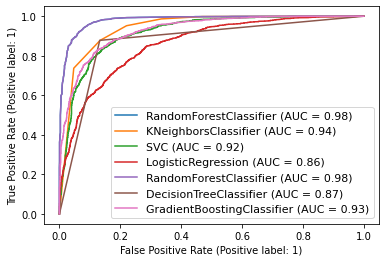

In [84]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

### Saving the model

In [85]:
import pickle
filename= 'rain prediction tomorrow'
pickle.dump(RFC, open(filename,'wb'))